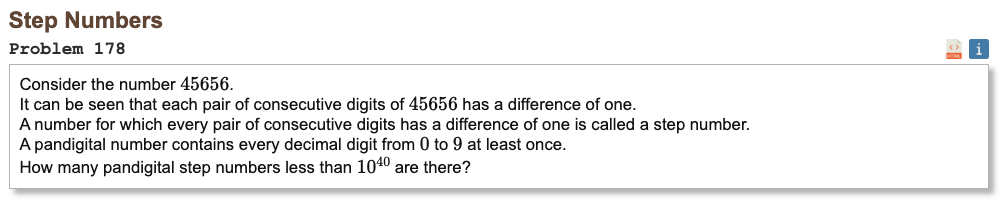

## Initial approach

* treat a step number as a path of digits where each next digit is exactly 1 higher or lower than the previous one
* numbers must be less than 10^40, so we only need to consider lengths from 1 up to 40 digits
* use dynamic programming where each state stores the last digit used and a bitmask of which digits 0 to 9 have appeared so far
* start the dp at length 1 with digits 1 to 9 only, so numbers do not have leading zero
* to extend a state at a given length, you can only move from digit d to d − 1 or d + 1 if that digit stays between 0 and 9
* update the bitmask to include the new digit
* once the length is at least 10
* any state whose bitmask has all 10 bits set represents pandigital step numbers of that length
* sum these counts over all lengths from 10 to 40 to get the total number of pandigital step numbers less than 10^40
* use collections.defaultdict to store sparse dp tables conveniently while counting paths

In [1]:
from collections import defaultdict

max_len = 40
full_mask = (1 << 10) - 1

dp = [defaultdict(int) for _ in range(max_len + 1)]
for d in range(1, 10):
    dp[1][(d, 1 << d)] = 1

for length in range(1, max_len):
    for (digit, mask), count in dp[length].items():
        for nd in (digit - 1, digit + 1):
            if 0 <= nd <= 9:
                nmask = mask | (1 << nd)
                dp[length + 1][(nd, nmask)] += count

result = 0
for length in range(10, max_len + 1):
    for (digit, mask), count in dp[length].items():
        if mask == full_mask:
            result += count

print("Result:", result)

Result: 126461847755
